In [1]:
import sys

# add path to core
sys.path.append("../../core/")

from parse import *
from connectivity import *
from plot_tools import *
from physical_block import *
from ode_system import ODESystem
from bdf import BDF1, BDF2
from problem_data import ProblemData
from bcmanager import BCManager
import matplotlib.pyplot as plt
from rc_calculator import RCCalculator
from scipy.integrate import simps

In [2]:
# problem data
pd = ProblemData()
coronary = "right"
fdr = "./"

In [3]:
# geometric processing
paths = parse_vessels(fdr)
chunks, bifurcations, connectivity = build_slices(paths, pd.tol, pd.maxlength)

In [4]:
# calculate resistance and capacitance
coeff_resistance = 0.8
coeff_capacitance = 0.3
rc = RCCalculator(fdr, coronary, coeff_resistance, coeff_capacitance)
rc.assign_resistances_to_outlets(chunks, connectivity)
rc.assign_capacitances_to_outlets(chunks, connectivity)

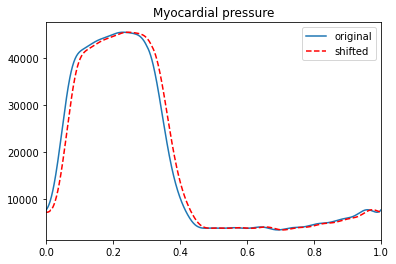

In [5]:
# create physical blocks and boundary conditions
blocks = create_physical_blocks(chunks, model_type = 'Windkessel2', problem_data = pd)
bcmanager = BCManager(chunks, connectivity,
                      inletbc_type = "pressure",
                      outletbc_type = "coronary",
                      folder = fdr,
                      problem_data = pd,
                      coronary = coronary,
                      distal_pressure_coeff = 0.54,
                      distal_pressure_shift = 15)

In [6]:
# create ode system and time marching algorithm
ode_system = ODESystem(blocks, connectivity, bcmanager)
bdf = BDF2(ode_system, connectivity, pd, bcmanager)

In [7]:
# solve problem
solutions, times = bdf.run()

Solving t = -2.00 s
Solving t = -1.99 s
Solving t = -1.99 s
Solving t = -1.98 s
Solving t = -1.98 s
Solving t = -1.97 s
Solving t = -1.97 s
Solving t = -1.96 s
Solving t = -1.96 s
Solving t = -1.95 s
Solving t = -1.95 s
Solving t = -1.94 s
Solving t = -1.94 s
Solving t = -1.93 s
Solving t = -1.93 s
Solving t = -1.92 s
Solving t = -1.92 s
Solving t = -1.91 s
Solving t = -1.91 s
Solving t = -1.90 s
Solving t = -1.90 s
Solving t = -1.89 s
Solving t = -1.89 s
Solving t = -1.88 s
Solving t = -1.88 s
Solving t = -1.87 s
Solving t = -1.87 s
Solving t = -1.86 s
Solving t = -1.86 s
Solving t = -1.85 s
Solving t = -1.85 s
Solving t = -1.84 s
Solving t = -1.84 s
Solving t = -1.83 s
Solving t = -1.83 s
Solving t = -1.82 s
Solving t = -1.82 s
Solving t = -1.81 s
Solving t = -1.81 s
Solving t = -1.80 s
Solving t = -1.80 s
Solving t = -1.79 s
Solving t = -1.79 s
Solving t = -1.78 s
Solving t = -1.78 s
Solving t = -1.77 s
Solving t = -1.77 s
Solving t = -1.76 s
Solving t = -1.76 s
Solving t = -1.75 s


Solving t = 0.23 s
Solving t = 0.24 s
Solving t = 0.24 s
Solving t = 0.25 s
Solving t = 0.25 s
Solving t = 0.26 s
Solving t = 0.26 s
Solving t = 0.27 s
Solving t = 0.27 s
Solving t = 0.28 s
Solving t = 0.28 s
Solving t = 0.29 s
Solving t = 0.29 s
Solving t = 0.30 s
Solving t = 0.30 s
Solving t = 0.31 s
Solving t = 0.31 s
Solving t = 0.32 s
Solving t = 0.32 s
Solving t = 0.33 s
Solving t = 0.33 s
Solving t = 0.34 s
Solving t = 0.34 s
Solving t = 0.35 s
Solving t = 0.35 s
Solving t = 0.36 s
Solving t = 0.36 s
Solving t = 0.37 s
Solving t = 0.37 s
Solving t = 0.38 s
Solving t = 0.38 s
Solving t = 0.39 s
Solving t = 0.39 s
Solving t = 0.40 s
Solving t = 0.40 s
Solving t = 0.41 s
Solving t = 0.41 s
Solving t = 0.42 s
Solving t = 0.42 s
Solving t = 0.43 s
Solving t = 0.43 s
Solving t = 0.44 s
Solving t = 0.44 s
Solving t = 0.45 s
Solving t = 0.45 s
Solving t = 0.46 s
Solving t = 0.46 s
Solving t = 0.47 s
Solving t = 0.47 s
Solving t = 0.48 s
Solving t = 0.48 s
Solving t = 0.49 s
Solving t = 

Solving t = 4.24 s
Solving t = 4.25 s
Solving t = 4.25 s
Solving t = 4.26 s
Solving t = 4.26 s
Solving t = 4.27 s
Solving t = 4.27 s
Solving t = 4.28 s
Solving t = 4.28 s
Solving t = 4.29 s
Solving t = 4.29 s
Solving t = 4.30 s
Solving t = 4.30 s
Solving t = 4.31 s
Solving t = 4.31 s
Solving t = 4.32 s
Solving t = 4.32 s
Solving t = 4.33 s
Solving t = 4.33 s
Solving t = 4.34 s
Solving t = 4.34 s
Solving t = 4.35 s
Solving t = 4.35 s
Solving t = 4.36 s
Solving t = 4.36 s
Solving t = 4.37 s
Solving t = 4.37 s
Solving t = 4.38 s
Solving t = 4.38 s
Solving t = 4.39 s
Solving t = 4.39 s
Solving t = 4.40 s
Solving t = 4.40 s
Solving t = 4.41 s
Solving t = 4.41 s
Solving t = 4.42 s
Solving t = 4.42 s
Solving t = 4.43 s
Solving t = 4.43 s
Solving t = 4.44 s
Solving t = 4.44 s
Solving t = 4.45 s
Solving t = 4.45 s
Solving t = 4.46 s
Solving t = 4.46 s
Solving t = 4.47 s
Solving t = 4.47 s
Solving t = 4.48 s
Solving t = 4.48 s
Solving t = 4.49 s
Solving t = 4.49 s
Solving t = 4.50 s
Solving t = 

Solving t = 8.30 s
Solving t = 8.31 s
Solving t = 8.31 s
Solving t = 8.32 s
Solving t = 8.32 s
Solving t = 8.33 s
Solving t = 8.33 s
Solving t = 8.34 s
Solving t = 8.34 s
Solving t = 8.35 s
Solving t = 8.35 s
Solving t = 8.36 s
Solving t = 8.36 s
Solving t = 8.37 s
Solving t = 8.37 s
Solving t = 8.38 s
Solving t = 8.38 s
Solving t = 8.39 s
Solving t = 8.39 s
Solving t = 8.40 s
Solving t = 8.40 s
Solving t = 8.41 s
Solving t = 8.41 s
Solving t = 8.42 s
Solving t = 8.42 s
Solving t = 8.43 s
Solving t = 8.43 s
Solving t = 8.44 s
Solving t = 8.44 s
Solving t = 8.45 s
Solving t = 8.45 s
Solving t = 8.46 s
Solving t = 8.46 s
Solving t = 8.47 s
Solving t = 8.47 s
Solving t = 8.48 s
Solving t = 8.48 s
Solving t = 8.49 s
Solving t = 8.49 s
Solving t = 8.50 s
Solving t = 8.50 s
Solving t = 8.51 s
Solving t = 8.51 s
Solving t = 8.52 s
Solving t = 8.52 s
Solving t = 8.53 s
Solving t = 8.53 s
Solving t = 8.54 s
Solving t = 8.54 s
Solving t = 8.55 s
Solving t = 8.55 s
Solving t = 8.56 s
Solving t = 

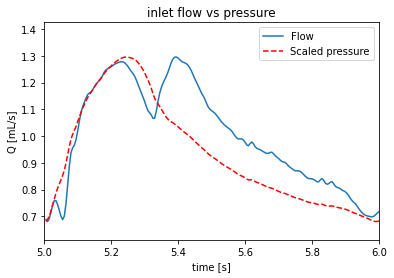

In [8]:
show_inlet_flow_vs_pressure(solutions, times, 5, 6, 9)


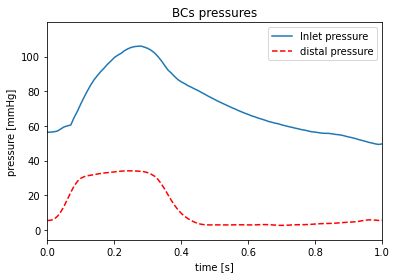

In [9]:
show_inlet_vs_distal_pressure(bcmanager, 0, 1)


In [10]:
positive_times = np.where(times > pd.t0)[0]
Pin = solutions[bcmanager.inletindex * 3 + 0, positive_times]
Qin = solutions[bcmanager.inletindex * 3 + 2, positive_times]
print("Flow = " + str(simps(Qin, times[positive_times]) / (pd.T - pd.t0)) + " [mL/min]")
print("Mean inlet pressure = " + str(simps(Pin, times[positive_times]) / 1333.2 / (pd.T - pd.t0)) + " [mmHg]")

Flow = 0.9949181059612437 [mL/min]
Mean inlet pressure = 75.16964159526133 [mmHg]
